In [3]:
# Yahoo finance API for daily stock and index prices
import yfinance as yf

In [4]:
# Enable ticker class to get information about particular stock
sp500 = yf.Ticker('^GSPC')
# Get historical market data for sp500
sp500 = sp500.history(period='max')
print(sp500)

                                  Open         High          Low        Close  \
Date                                                                            
1927-12-30 00:00:00-05:00    17.660000    17.660000    17.660000    17.660000   
1928-01-03 00:00:00-05:00    17.760000    17.760000    17.760000    17.760000   
1928-01-04 00:00:00-05:00    17.719999    17.719999    17.719999    17.719999   
1928-01-05 00:00:00-05:00    17.549999    17.549999    17.549999    17.549999   
1928-01-06 00:00:00-05:00    17.660000    17.660000    17.660000    17.660000   
...                                ...          ...          ...          ...   
2024-02-12 00:00:00-05:00  5026.830078  5048.390137  5016.830078  5021.839844   
2024-02-13 00:00:00-05:00  4967.939941  4971.299805  4920.310059  4953.169922   
2024-02-14 00:00:00-05:00  4976.439941  5002.520020  4956.450195  5000.620117   
2024-02-15 00:00:00-05:00  5003.140137  5032.720215  4999.439941  5029.729980   
2024-02-16 00:00:00-05:00  5

<AxesSubplot: title={'center': 'S&P 500'}, xlabel='Date'>

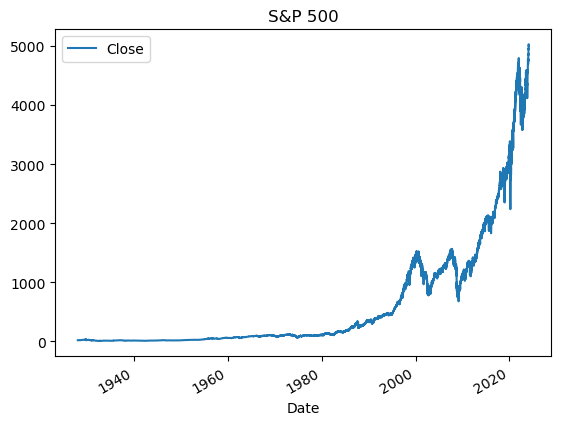

In [8]:
# Plot the close prices of sp500, using date/time index as x-axis
sp500.plot.line(y='Close', use_index=True, title='S&P 500')

In [ ]:
# Data cleaning - remove columns that are not needed; dividends and stock splits are more useful for individual stocks
del sp500['Dividends']
del sp500['Stock Splits']

In [9]:
# Target of ML model is to predict if the stock price will go up or down tomorrow; we care more about the directionality of stock prices than the actual price
# Set new table column "Tomorrow" to be the "Close" price of the next day - this sets the target for the ML model
sp500["Tomorrow"] = sp500["Close"].shift(-1)
print(sp500)

                                  Open         High          Low        Close  \
Date                                                                            
1927-12-30 00:00:00-05:00    17.660000    17.660000    17.660000    17.660000   
1928-01-03 00:00:00-05:00    17.760000    17.760000    17.760000    17.760000   
1928-01-04 00:00:00-05:00    17.719999    17.719999    17.719999    17.719999   
1928-01-05 00:00:00-05:00    17.549999    17.549999    17.549999    17.549999   
1928-01-06 00:00:00-05:00    17.660000    17.660000    17.660000    17.660000   
...                                ...          ...          ...          ...   
2024-02-12 00:00:00-05:00  5026.830078  5048.390137  5016.830078  5021.839844   
2024-02-13 00:00:00-05:00  4967.939941  4971.299805  4920.310059  4953.169922   
2024-02-14 00:00:00-05:00  4976.439941  5002.520020  4956.450195  5000.620117   
2024-02-15 00:00:00-05:00  5003.140137  5032.720215  4999.439941  5029.729980   
2024-02-16 00:00:00-05:00  5

In [10]:
# Set new table column "Target" to be 1 if "Tomorrow" > "Close", else 0. So, 1 means the stock price went up, 0 means the stock price went down
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
print(sp500)

                                  Open         High          Low        Close  \
Date                                                                            
1927-12-30 00:00:00-05:00    17.660000    17.660000    17.660000    17.660000   
1928-01-03 00:00:00-05:00    17.760000    17.760000    17.760000    17.760000   
1928-01-04 00:00:00-05:00    17.719999    17.719999    17.719999    17.719999   
1928-01-05 00:00:00-05:00    17.549999    17.549999    17.549999    17.549999   
1928-01-06 00:00:00-05:00    17.660000    17.660000    17.660000    17.660000   
...                                ...          ...          ...          ...   
2024-02-12 00:00:00-05:00  5026.830078  5048.390137  5016.830078  5021.839844   
2024-02-13 00:00:00-05:00  4967.939941  4971.299805  4920.310059  4953.169922   
2024-02-14 00:00:00-05:00  4976.439941  5002.520020  4956.450195  5000.620117   
2024-02-15 00:00:00-05:00  5003.140137  5032.720215  4999.439941  5029.729980   
2024-02-16 00:00:00-05:00  5

In [11]:
# Since we're dealing with stock market data, the market could have changed significantly in the past 20 years. We'll only use data from 1990 onwards.
sp500 = sp500.loc['1990-01-01':].copy()
print(sp500)

                                  Open         High          Low        Close  \
Date                                                                            
1990-01-02 00:00:00-05:00   353.399994   359.690002   351.980011   359.690002   
1990-01-03 00:00:00-05:00   359.690002   360.589996   357.890015   358.760010   
1990-01-04 00:00:00-05:00   358.760010   358.760010   352.890015   355.670013   
1990-01-05 00:00:00-05:00   355.670013   355.670013   351.350006   352.200012   
1990-01-08 00:00:00-05:00   352.200012   354.239990   350.540009   353.790009   
...                                ...          ...          ...          ...   
2024-02-12 00:00:00-05:00  5026.830078  5048.390137  5016.830078  5021.839844   
2024-02-13 00:00:00-05:00  4967.939941  4971.299805  4920.310059  4953.169922   
2024-02-14 00:00:00-05:00  4976.439941  5002.520020  4956.450195  5000.620117   
2024-02-15 00:00:00-05:00  5003.140137  5032.720215  4999.439941  5029.729980   
2024-02-16 00:00:00-05:00  5

In [13]:
# Begin training the model. We'll use a random forest classifier since it usually avoids overfitting (as long as not too deep) and is robust to outliers (non-linear relationships, 
# which are common in stock market data)
from sklearn.ensemble import RandomForestClassifier

# N_estimators is the number of trees in the forest; min_samples_split is the minimum number of samples required to split an internal node (# of samples to consider, protects against overfitting); 
# random_state is the seed used by the random number generator (to ensure reproducibility of the model's results)
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# Split data into train and test sets. Since this is time series data, cross validation is not good because it shuffles the data, which is not good for time series data 
# (i.e. using future data that we wouldn't usually have).
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [26]:
# Get metrics on resulting model
from sklearn.metrics import accuracy_score
import pandas as pd

test_predictions = model.predict(test[predictors])
test_predictions = pd.Series(test_predictions, index=test.index) # Convert numpy array to pandas series for easier manipulation
print(test_predictions)
accuracy = accuracy_score(test["Target"], test_predictions)
print("Accuracy: ", accuracy)

Date
2023-09-26 00:00:00-04:00    1
2023-09-27 00:00:00-04:00    1
2023-09-28 00:00:00-04:00    1
2023-09-29 00:00:00-04:00    1
2023-10-02 00:00:00-04:00    1
                            ..
2024-02-12 00:00:00-05:00    0
2024-02-13 00:00:00-05:00    0
2024-02-14 00:00:00-05:00    0
2024-02-15 00:00:00-05:00    0
2024-02-16 00:00:00-05:00    0
Length: 100, dtype: int32
Accuracy:  0.44


<AxesSubplot: xlabel='Date'>

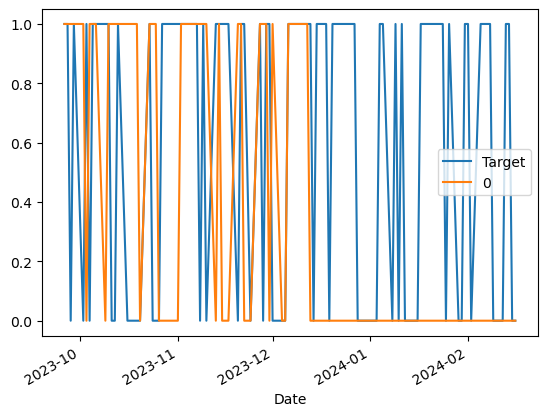

In [18]:
# Plot the predictions
combined = pd.concat([test["Target"], test_predictions], axis=1) # axis=1 means concatenate columns
combined.plot()

In [27]:
# Build a more robust way of testing the model - currently we're only testing on 100 days of data, which is not enough to get a good idea of the model's performance
# Summarize what we've done so far into a function; uses training data to train the model, then uses the resulting model to predict on the test data
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    test_predictions = model.predict(test[predictors])
    test_predictions = pd.Series(test_predictions, index=test.index, name="Predictions")
    combined_res = pd.concat([test["Target"], test_predictions], axis=1)
    return combined_res

# Stock market years are about 250 trading days long, so we'll use that as the step size for the backtest. We'll start at 2500 days to give the model enough data to train on.
# Essentially, we are training on 10 years of data, then testing on the next year, then take the 11 years of data and predict for the next year, and continue until we run out of data.
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [28]:
predictions = backtest(sp500, model, predictors)

In [29]:
# Calculate the accuracy of the backtest
accuracy = accuracy_score(predictions["Target"], predictions["Predictions"])
print(accuracy)

0.48983273204329286


In [31]:
# Adding additional predictors to the model to see if it improves the accuracy
# Ratios are more important for this case - we care more about the relative price of the stock than the absolute price; how much the stock price has changed relative to its past

horizons = [2,5,60,250,1000] # 2 days, 5 days, 60 days, 250 days, 1000 days for calculating rolling averages of close price
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"] # Take the sum of the target variable over the past horizon days
    new_predictors += [ratio_column, trend_column]

# Close price ratio and trend added as new predictors
sp500 = sp500.dropna() # Drop rows with NaN values
print(sp500)

                                  Open         High          Low        Close  \
Date                                                                            
1993-12-14 00:00:00-05:00   465.730011   466.119995   462.459991   463.059998   
1993-12-15 00:00:00-05:00   463.059998   463.690002   461.839996   461.839996   
1993-12-16 00:00:00-05:00   461.859985   463.980011   461.859985   463.339996   
1993-12-17 00:00:00-05:00   463.339996   466.380005   463.339996   466.380005   
1993-12-20 00:00:00-05:00   466.380005   466.899994   465.529999   465.850006   
...                                ...          ...          ...          ...   
2024-02-09 00:00:00-05:00  5004.169922  5030.060059  5000.339844  5026.609863   
2024-02-12 00:00:00-05:00  5026.830078  5048.390137  5016.830078  5021.839844   
2024-02-13 00:00:00-05:00  4967.939941  4971.299805  4920.310059  4953.169922   
2024-02-14 00:00:00-05:00  4976.439941  5002.520020  4956.450195  5000.620117   
2024-02-15 00:00:00-05:00  5

In [53]:
# Update model and change hyperparameters
model = RandomForestClassifier(n_estimators=200, min_samples_split=25, random_state=1)

# Update predict function
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])

    # Want more control on what is 1 and 0 (use probabilities)
    test_predictions = model.predict_proba(test[predictors])[:,1] # Get second column, which is the probability that stock goes up
    test_predictions[test_predictions >= 0.6] = 1
    test_predictions[test_predictions < 0.6] = 0
    
    test_predictions = pd.Series(test_predictions, index=test.index, name="Predictions")
    combined_res = pd.concat([test["Target"], test_predictions], axis=1)
    return combined_res

In [54]:
predictions = backtest(sp500, model, new_predictors)

In [55]:
# Get new accuracy of model
accuracy = accuracy_score(predictions["Target"], predictions["Predictions"])
print(accuracy)

0.48067490680792624
